## *Exploración inicial* del dataset iris, que tiene información de 3 especies

In [1]:
# Librerias necesarias

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

In [3]:
# Importamos los datos

iris = datasets.load_iris()

print(iris.keys())
print(iris.target_names)
print(iris.feature_names)
print(iris.DESCR)

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'target_names'])
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76 

**Com estan organitzados los datos? Que estructuración tiene?**

In [4]:
type(iris.data) 

numpy.ndarray

Esta estructura matricial (una matriz no es mas que una lista en 2D) está gestionada con la libreria Numpy

[Tutorial inicial](# https://docs.scipy.org/doc/numpy/user/quickstart.html)

In [5]:
iris.data.shape # Esta instrucción nos muestra la dimensionalidad de la matriz

(150, 4)

Este conjunto de datos nos viene etiquetado, es decir que por cada muestra sabemos a que especie pertenece
Vamos a explorar: iris.target

**Numpy permite realizar selecciones inteligents sobre nuestra matriz**

In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
#División del conjunto de datos con las diferentes especies

setosa = iris.data[iris.target > 2, :]

#versicolor = iris.data[iris.target == 1, :]
#virginica = iris.data[iris.target == 2, :]
#setosa.shape
setosa.shape

(0, 4)

**I cálculos agregados** , por ejemplo la media de cada una de las características de cada especie.

In [ ]:
valors_m = np.zeros((3, 4), dtype= np.float) # Cream una matriu buida on guardarem els valors agregats

mitjanes_setosa = np.mean(setosa, axis=0)

valors_m[0, :] = mitjanes_setosa #tornam a fer selecció intel·ligent

valors_m[1, :] = np.mean(versicolor, axis=0)
valors_m[2, :]  = np.mean(virginica, axis=0)

print(valors_m)


### Visualización con Matplotlib
Matplotlib es otra libreria, está nos permite realizar visualizaciones de nuestros datos

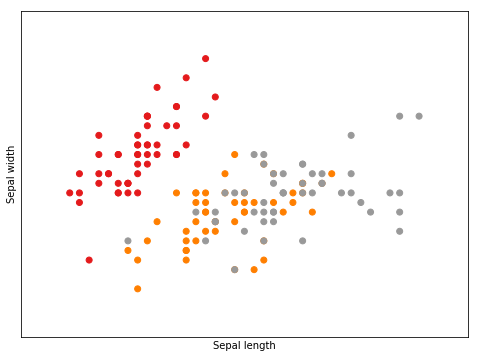

In [18]:
#Vamos a ver como podemos observar las longitudes de los sépalos

X = iris.data[:, :2]
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 #Miram quins son els valors min i max per centrar el dibuix
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6)) #Creamos una figura nueva

# Dibujamos las 2 primeras columnas del conjunto de datos (longitud y amplitud del sépalo)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)

#Añadimos diferentes decoraciones a la figura
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())

plt.show()

Podemos realizar la misma visualización de los pétalos

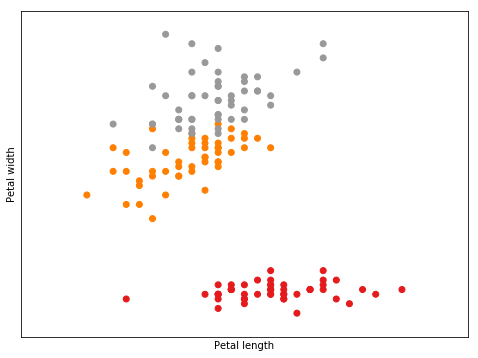

In [19]:
X = iris.data[:, 1:3]
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 #Miram quins son els valors min i max per centrar el dibuix
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)

# Añadimos diferentes decoraciones a la figura
plt.xlabel('Petal length')
plt.ylabel('Petal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())
plt.show()

## Veremos como podemos obtener conocimiento del conjunto de datos

Usaremos una técnica "simple" conocida como Kmeans, ya que ahora lo que nos interesa es la parte tecnológica. Queremos conocer la tercera
libreria que usaremos en esta parte del curso. Scikit la libreria científica de Python.

In [21]:
from sklearn.cluster import KMeans

X = iris.data[:, 0:2]  # Realizaremos la clasificación en base al sépalo de las plantas
Y = iris.target
h = .02  # step size in the mesh


x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

# Creamos una parrilla sobre el espacio 2D que pueden ocupar los valores de los sépalos de un iris.
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


Utilizaremos una técnica de aprendizaje no supervisado llamada Kmeans.
Donde el propio clasificador es el que decide / aprende como la información está organizada.

[Tutorial kmeans](https://www.datascience.com/blog/k-means-clustering)

In [22]:
# Cada clasificador de la libreria Scikit tiene un método (función) al que llamamos constructor, particular. En el que podemos
# especificar sus parámetros particulares

kmeans = KMeans(n_clusters=3, random_state=0)

# La función fit realiza el proceso de creación del modelo en base a los ejemplos que  le proporcionamos
kmeans.fit(X)

# La función predict proporciona una predicción de nuestro clasificador en base a nuevos ejemplos
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])


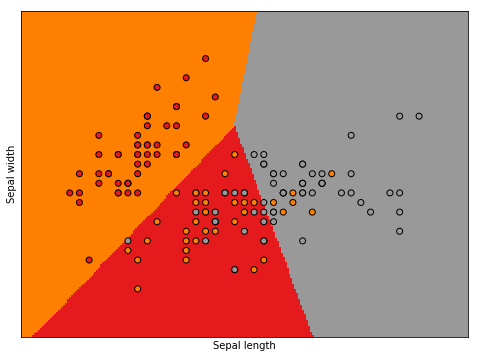

In [23]:
# Dibujamos los resultados


Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Set1)

# Para saber cómo nos ha ido dibujamos los puntos que hemos usado para entrenar nuestro clasificador
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()